# Load and preprocess the data

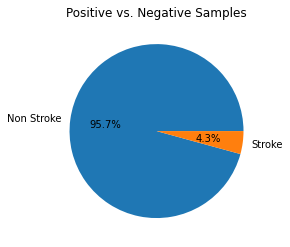

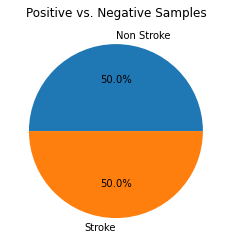

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df = df.dropna() # remove rows with NaN bmi

# attempt to perform dimensionality reduction via PCA

# # convert categorical features into numeric
df['gender'].replace(['Male', 'Female', 'Other'], [0, 1, 2], inplace=True)
df['ever_married'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['work_type'].replace(['children', 'Govt_job', 'Never_worked', 'Private', 'Self-employed'], [0, 1, 2, 3, 4], inplace=True)
df['Residence_type'].replace(['Urban', 'Rural'], [1, 0], inplace=True)
df['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'], [0, 1, 2, 3], inplace=True)

# # scale features
scaler = StandardScaler()
num_cols = ['age', 'avg_glucose_level', 'bmi']
df[num_cols] = scaler.fit_transform(df[num_cols])

# # dimensionality reduction with PCA
# pca = PCA(n_components=9)
# pca.fit(df)
# columns = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
# df = pd.DataFrame(pca.transform(df), columns=columns, index=df.index)
# print(df.shape)
# df.head()

# visualization of positive and negative samples
plt.title("Positive vs. Negative Samples")
plt.pie(np.array(df['stroke'].value_counts()), autopct='%1.1f%%', labels=['Non Stroke', 'Stroke'])
plt.show()

# balance the dataset
oversample = RandomOverSampler(sampling_strategy='minority')
X = df.drop(['stroke'], axis=1)
y = df['stroke']
X, y = oversample.fit_resample(X, y)

# visualization of positive and negative samples
plt.title('Positive vs. Negative Samples')
plt.pie(np.array(y.value_counts()), autopct='%1.1f%%', labels=['Non Stroke', 'Stroke'])
plt.show()

# Split the data into training and test sets

In [2]:
from sklearn.model_selection import train_test_split

SEED = 7
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size=0.7, random_state=SEED, shuffle=True, stratify=y)

# Build and train each model, and evaluate each model on the test set

0.7698581560283688
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1410
           1       0.74      0.82      0.78      1410

    accuracy                           0.77      2820
   macro avg       0.77      0.77      0.77      2820
weighted avg       0.77      0.77      0.77      2820

0.5205673758865248
              precision    recall  f1-score   support

           0       0.52      0.58      0.55      1410
           1       0.52      0.46      0.49      1410

    accuracy                           0.52      2820
   macro avg       0.52      0.52      0.52      2820
weighted avg       0.52      0.52      0.52      2820

0.9716312056737588
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1410
           1       0.95      1.00      0.97      1410

    accuracy                           0.97      2820
   macro avg       0.97      0.97      0.97      2820
weighted avg     

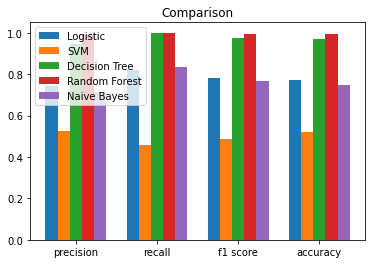

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

NUM_FOLDS = 5

# data lists
matrix = []

models = [LogisticRegression(), SVC(),  DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB()]
for model in models:
    cross_validate(model, X_train, y_train, cv=NUM_FOLDS)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # print metrics for each class label (confusion matrix)
    data = classification_report(y_test, y_pred,output_dict=True)
    print(data['accuracy'])
    print(classification_report(y_test, y_pred))
    
    acc = data['accuracy']
    listOfValues = []
    
    # loop through result
    for key in data['1']:
        if (key != 'support'):
            listOfValues.append(data['1'][key])
    
    listOfValues.append(acc)
    matrix.append(listOfValues)

labels = ['precision', 'recall', 'f1 score', 'accuracy']
X_axis = np.arange(len(labels))
WIDTH = 0.15
  
plt.bar(X_axis - 0.30, matrix[0], width=WIDTH, label='Logistic')
plt.bar(X_axis - 0.15, matrix[1], width=WIDTH, label='SVM')
plt.bar(X_axis + 0, matrix[2], width=WIDTH, label='Decision Tree')
plt.bar(X_axis + 0.15, matrix[3], width=WIDTH, label='Random Forest')
plt.bar(X_axis + 0.30, matrix[4], width=WIDTH, label='Naive Bayes')

plt.xticks(X_axis, labels)
plt.title('Comparison')
plt.legend()
plt.show()
